## Importing Dependencies

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Globbed Dataset

In [2]:
df = pd.read_csv('/content/data-melanoma-globbed.csv')

In [3]:
df.head(10)

,image_name,0.9526,0.9512,0.9509,0.9508,0.95078,0.95076,0.95074,0.95072,0.9506,0.95054,0.95052,0.9504,0.95034,0.95032,0.9502,0.95014,0.95012,0.9498,0.9497,0.94884,0.94882,0.9486,0.9477,0.9472,0.9467,0.9463,0.9461,0.94606,0.94604,0.94602,0.94584,0.94582,0.9450,0.9432,0.9374,0.9366,0.93654,0.93652,0.9363,0.9362,0.9361,0.9349,0.9313,0.9312,0.9310,0.9305,0.8891,0.8791,0.8687,0.8685,0.8623,0.8468,0.8359,0.8152
0,ISIC_0052060,0.000153,0.342503,0.299514,0.292043,0.343137,0.340997,0.339474,0.331618,0.340968,0.342192,0.280324,0.314757,0.274449,0.377481,0.232055,0.368561,0.372798,0.387629,0.333220,0.446169,0.338386,0.455784,0.432120,0.480513,0.337470,0.165171,0.205923,0.206743,0.182989,0.159236,0.231190,0.225792,0.104494,0.348827,0.366973,0.000401,0.000338,0.000358,0.372487,0.000300,0.000353,0.000241,0.000448,0.000395,0.000134,0.398408,0.080987,0.000439,9.884858e-15,9.912966e-20,0.251823,0.235563,0.564609,7.577149e-11
1,ISIC_0052349,0.000118,0.160768,0.141080,0.135139,0.158631,0.157052,0.153542,0.141621,0.154847,0.159652,0.099222,0.145620,0.079563,0.198166,0.109431,0.172856,0.175226,0.183524,0.145840,0.277234,0.161721,0.269801,0.208416,0.316768,0.156101,0.059062,0.092761,0.093715,0.074884,0.056054,0.087309,0.080404,0.042451,0.161342,0.172728,0.000255,0.000221,0.000213,0.182281,0.000221,0.000255,0.000238,0.000254,0.000193,0.000085,0.196409,0.076095,0.000364,7.379985e-15,3.179191e-17,0.071902,0.017331,0.260911,3.864683e-14
2,ISIC_0058510,0.002049,0.169979,0.233275,0.233992,0.210452,0.211156,0.208899,0.211403,0.174254,0.210913,0.235486,0.249247,0.234554,0.198401,0.189168,0.189933,0.186513,0.174543,0.104981,0.174298,0.162311,0.157320,0.138635,0.162247,0.264502,0.354085,0.369443,0.374042,0.366422,0.358802,0.351634,0.341759,0.362448,0.272130,0.277383,0.000602,0.000560,0.000531,0.247372,0.000561,0.000603,0.000599,0.000564,0.000465,0.000229,0.245528,0.074774,0.003048,1.514500e-21,6.940844e-23,-0.365863,0.012922,0.417055,1.598343e-03
3,ISIC_0073313,0.000135,0.036537,0.059053,0.058896,0.042801,0.043045,0.040730,0.040948,0.028622,0.048384,0.039654,0.062323,0.034970,0.046716,0.049080,0.035386,0.034150,0.029825,-0.000455,0.054547,0.024762,0.050237,0.016849,0.058463,0.065749,0.094705,0.132410,0.131151,0.108994,0.086838,0.136271,0.133773,0.069159,0.067463,0.069026,0.000262,0.000227,0.000220,0.058118,0.000224,0.000259,0.000236,0.000265,0.000178,0.000088,0.058233,0.078618,0.002627,9.882960e-14,1.415344e-17,-0.123408,0.065972,0.100016,1.191458e-09
4,ISIC_0073502,0.000448,0.354162,0.305341,0.298240,0.360089,0.357845,0.355536,0.352611,0.364487,0.358664,0.301652,0.321872,0.307198,0.386535,0.235295,0.391111,0.396281,0.414376,0.368939,0.439426,0.366021,0.446400,0.468664,0.465871,0.345504,0.142940,0.195447,0.209566,0.182238,0.154910,0.193599,0.164842,0.092333,0.357320,0.375386,0.000458,0.000452,0.000424,0.385571,0.000450,0.000455,0.000470,0.000402,0.003016,0.000163,0.421044,0.119621,0.000000,7.901788e-15,1.118942e-17,0.270190,0.039149,0.581824,6.801176e-07
5,ISIC_0074618,0.002300,0.513127,0.510747,0.506094,0.553081,0.553997,0.556684,0.559243,0.534840,0.561013,0.546267,0.543323,0.560112,0.549566,0.401765,0.563201,0.564887,0.570790,0.492222,0.542536,0.517146,0.563101,0.588499,0.539020,0.580553,0.482245,0.495001,0.495160,0.501561,0.507961,0.483541,0.445056,0.390849,0.599167,0.619728,0.006262,0.006866,0.006270,0.612992,0.006835,0.006224,0.007081,0.004750,0.009316,0.002346,0.624162,0.089385,0.097898,1.281743e-14,1.742706e-15,0.047337,0.158724,0.952845,8.084956e-01
6,ISIC_0076801,0.000885,0.414435,0.404490,0.399242,0.444425,0.443947,0.444286,0.443329,0.431494,0.445679,0.418387,0.429203,0.426456,0.453409,0.316469,0.458616,0.460981,0.469260,0.402161,0.471377,0.425179,0.487881,0.494095,0.480361,0.459164,0.345083,0.367800,0.362794,0.357428,0.352062,0.369894,0.351348,0.271494,0.474145,0.492510,0.000856,0.000755,0.000743,0.484639,0.000729,0.000824,0.000728,0.000867,0.000837,0.000289,0.511634,0.079266,0.000540,8.352886e-17,9.621170e-22,0.050830,0.042597,0.758778,6.269940e-

In [4]:
df.shape

(10982, 55)

## Graph showing : MEAN

In [5]:
def show_mean(idx = 0):
  x_mean = [np.mean(df.iloc[idx][1:][::-1])]*len(df.columns[1:][::-1])
  plt.figure(figsize=(35,10))
  plt.plot(df.columns[1:][::-1], df.iloc[idx][1:][::-1], marker='o', markerfacecolor='blue', markersize=5, label="scores")
  plt.plot(df.columns[1:][::-1], x_mean, label="median") 
  plt.xticks(rotation=90)
  plt.xlabel('SCORES : sideways better') 
  plt.ylabel('PROBABILITIES') 
  plt.title('AGAINST MEAN') 
  plt.legend()   
  plt.grid(True)
  plt.show()

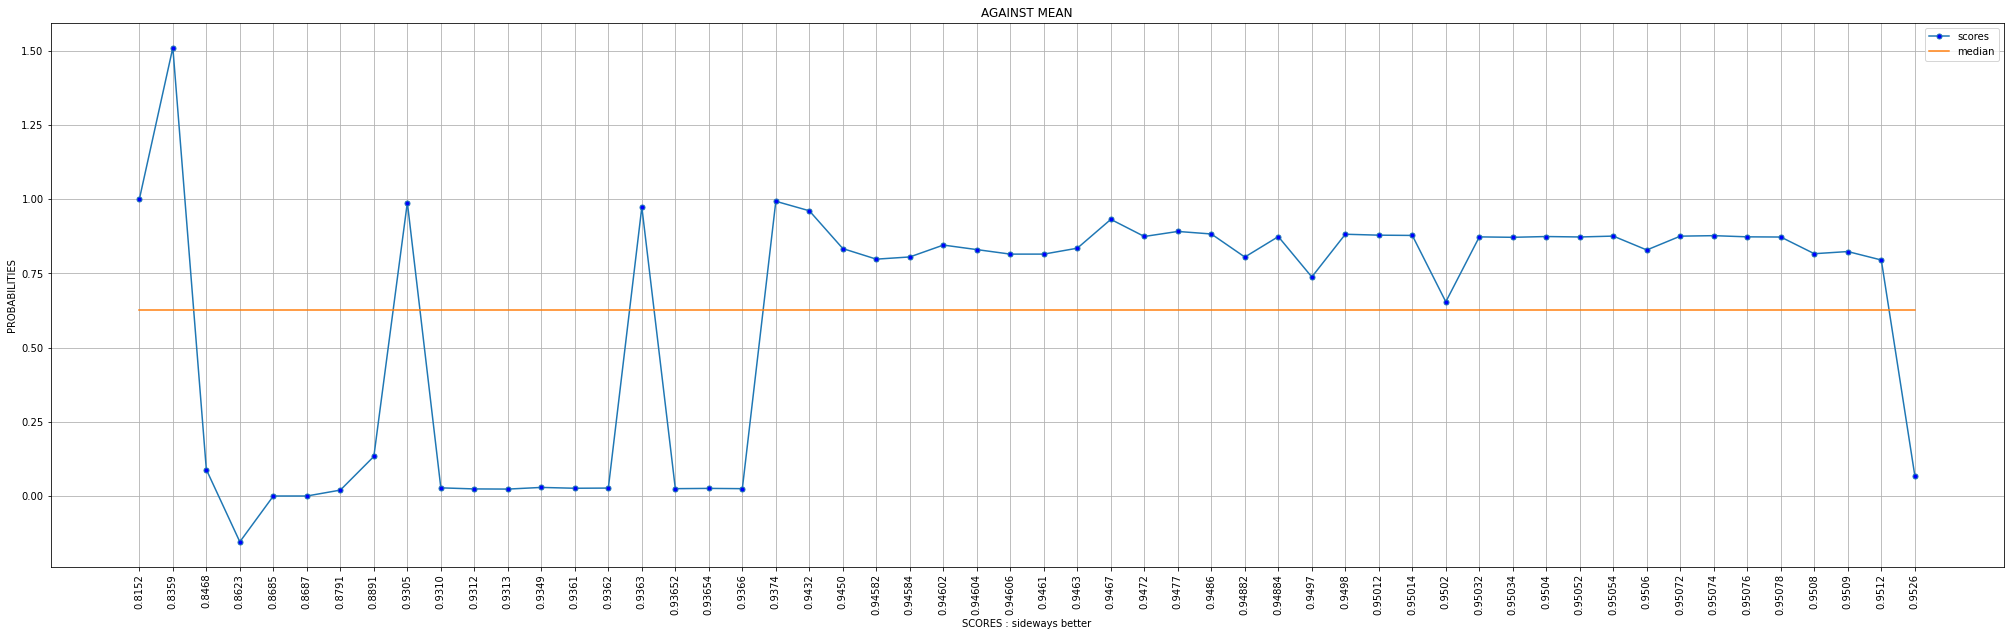

In [6]:
show_mean(100)

## Graph showing : MEDIAN

In [7]:
def show_median(idx = 0):
  x_median = [np.median(df.iloc[idx][1:][::-1])]*len(df.columns[1:][::-1])
  plt.figure(figsize=(35,10))
  plt.plot(df.columns[1:][::-1], df.iloc[idx][1:][::-1], marker='o', markerfacecolor='blue', markersize=5, label="scores")
  plt.plot(df.columns[1:][::-1], x_median, label="median")
  plt.xticks(rotation=90) 
  plt.xlabel('SCORES : sideways better') 
  plt.ylabel('PROBABILITIES') 
  plt.title('AGAINST MEDIAN') 
  plt.legend()   
  plt.grid(True)
  plt.show() 

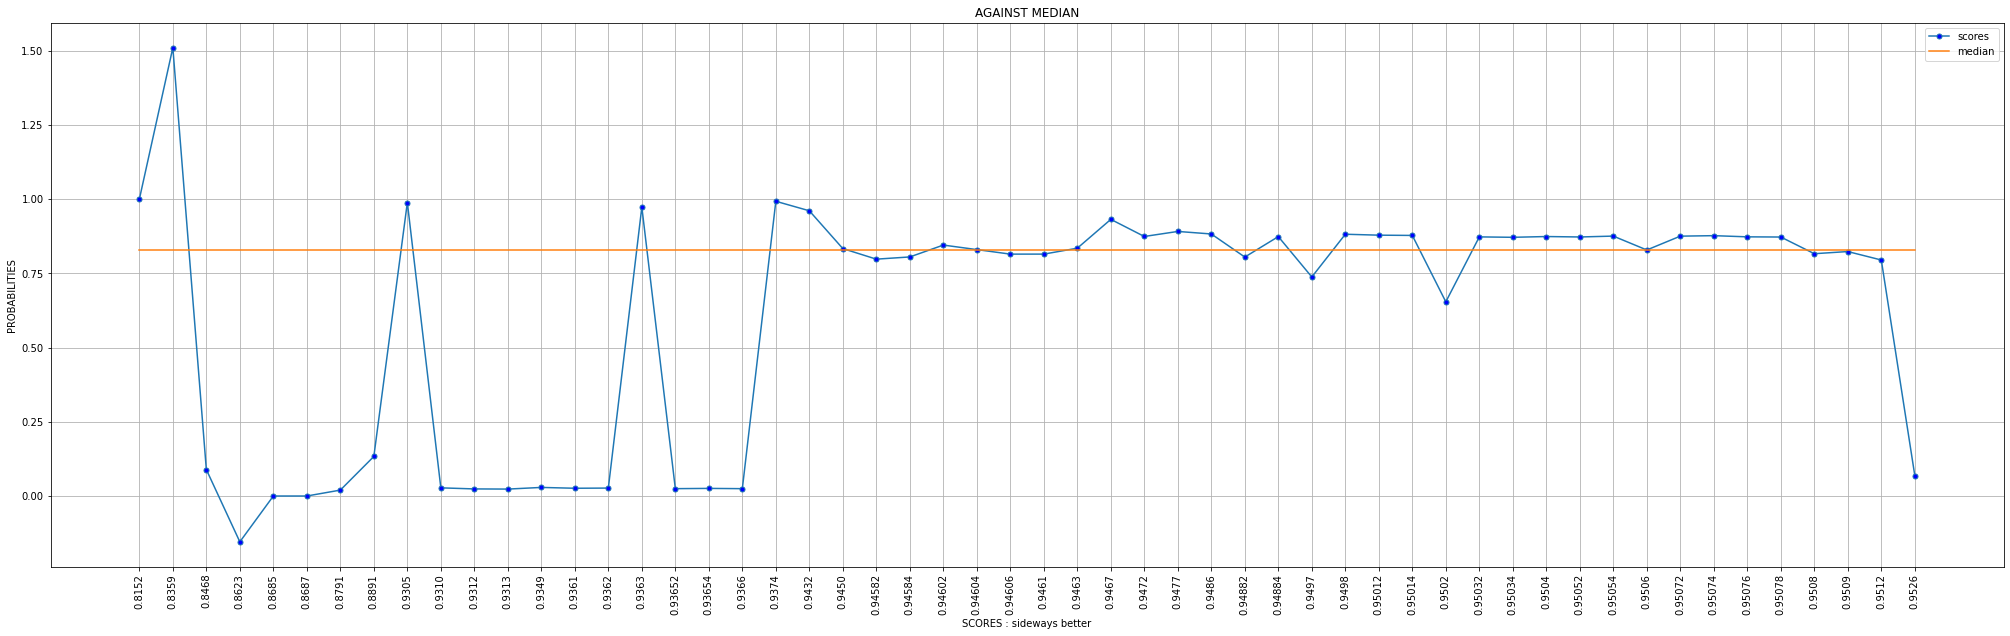

In [8]:
show_median(100)

## Ensembles

### Linear Regression

In [9]:
def LinReg(j, score):
  X = []
  for i in df.columns[1:].values:
      X.append(float(i))
  X = np.array(X).reshape(-1, 1)
  y = df.iloc[j][1:].values.reshape(-1, 1)
  
  regressor = LinearRegression()  
  regressor.fit(X, y)
  
  X_test = [score]
  X_test = np.array(X_test).reshape(-1,1)
  y_pred = regressor.predict(X_test)
  
  return y_pred.flatten()

In [10]:
def LinRegFitGraph(j = 0):
  X = []
  for i in df.columns[1:].values:
      X.append(float(i))
  X = np.array(X).reshape(-1, 1)
  y = df.iloc[j][1:].values.reshape(-1, 1)
  
  regressor = LinearRegression()  
  regressor.fit(X, y)

  plt.figure(figsize=(12,5))
  plt.scatter(X.flatten(), y.flatten(), color = 'blue' , label='SCORES') 
  plt.plot(X.flatten(), regressor.predict(X).flatten(), color = 'red', label='PREDICTION') 
  plt.xlabel('SCORES : sideways better') 
  plt.ylabel('PROBABILITIES') 
  plt.title('Linear Regression'+'of index : {}'.format(j)) 
  plt.legend()   
  plt.grid(True)
  plt.show()

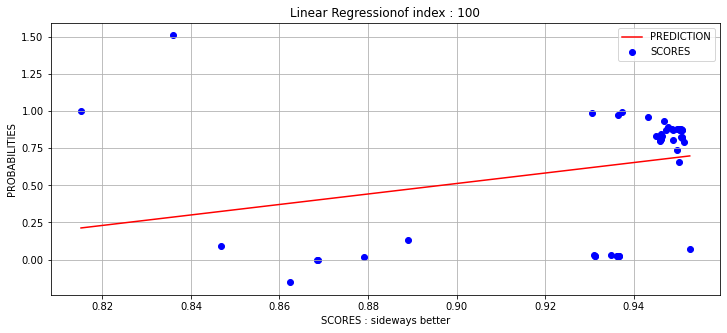

In [11]:
LinRegFitGraph(100)

### Polynomial Regression

In [12]:
def PolyReg(j, score, deg=6):
  X = []
  for i in df.columns[1:].values:
      X.append(float(i))
  X = np.array(X).reshape(-1, 1)
  y = df.iloc[j][1:].values.reshape(-1, 1)
  
  poly = PolynomialFeatures(degree = deg) 
  X_poly = poly.fit_transform(X) 
  poly.fit(X_poly, y) 
  lin2 = LinearRegression() 
  lin2.fit(X_poly, y)
  
  X_test = [score]
  X_test = np.array(X_test).reshape(-1,1)
  y_pred = lin2.predict(poly.fit_transform(X_test))
  
  return y_pred.flatten()

In [13]:
def PolyRegFitGraph(j = 0):
  X = []
  for i in df.columns[1:].values:
      X.append(float(i))
  X = np.array(X).reshape(-1, 1)
  y = df.iloc[j][1:].values.reshape(-1, 1)
  
  poly = PolynomialFeatures(degree = 6) 
  X_poly = poly.fit_transform(X) 
  poly.fit(X_poly, y) 
  lin2 = LinearRegression() 
  lin2.fit(X_poly, y)

  plt.figure(figsize=(12,5))
  plt.scatter(X.flatten(), y.flatten(), color = 'blue' , label='SCORES') 
  plt.plot(X.flatten(), lin2.predict(poly.fit_transform(X)).flatten(), color = 'red', label='PREDICTION') 
  plt.xlabel('SCORES : sideways better') 
  plt.ylabel('PROBABILITIES') 
  plt.title('Polynomial Regression'+'of index : {}'.format(j)) 
  plt.legend()   
  plt.grid(True)
  plt.show()

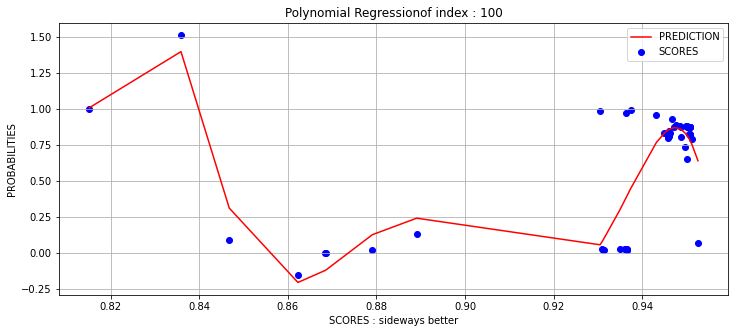

In [14]:
PolyRegFitGraph(100)

## Prediction : Regression

In [15]:
def Reg(option, score, polydeg=6):
  if option=='LinReg':
      target = []
      for k in range(len(df)):
          pred = LinReg(k, score)[0]
          if pred<0:
              target.append(0)
          else :
              target.append(pred)
      sub = pd.DataFrame()
      sub['image_name'] = df['image_name'].values
      sub['target'] = target
      return sub
  elif option=='PolyReg' :
      target = []
      for k in range(len(df)):
          pred = PolyReg(k, score, polydeg)[0]
          if pred<0:
              target.append(0)
          else :
              target.append(pred)
      sub = pd.DataFrame()
      sub['image_name'] = df['image_name'].values
      sub['target'] = target
      return sub

In [17]:
# Lin or Poly
REG = 'Poly'

# SCORE TO BE PREDICTED
SCORE = 0.9520

# DEGREE OF POLYNOMIAL REG (if applicable)
DEGREE = 6 

if REG=='Lin':
  sub_reg = Reg('LinReg' , SCORE)
  sub_reg.to_csv('LinReg-{}.csv'.format(str(SCORE)), index=False)
  print(sub_reg.head(10))
else :
  sub_reg = Reg('PolyReg' , SCORE, DEGREE)
  sub_reg.to_csv('PolyReg-{}-Degree-{}.csv'.format(str(DEGREE), str(SCORE)), index=False)
  print(sub_reg.head(10))

     image_name    target
0  ISIC_0052060  0.314421
1  ISIC_0052349  0.142369
2  ISIC_0058510  0.115988
3  ISIC_0073313  0.015326
4  ISIC_0073502  0.332561
5  ISIC_0074618  0.453579
6  ISIC_0076801  0.369040
7  ISIC_0077586  0.610336
8  ISIC_0082004  0.482890
9  ISIC_0082785  0.450670


### MinMax ensemble

In [18]:
def minmax(df, low, high):
  df_cpy = df.copy(deep=True)
  
  df_cpy['max'] = df_cpy.iloc[: , 1:(df_cpy.shape[1]+4)].max(axis = 1)
  df_cpy['min'] = df_cpy.iloc[: , 1:(df_cpy.shape[1]+4)].min(axis = 1)

  df_cpy['mean'] = df_cpy.iloc[: , 1:(df_cpy.shape[1]+4)].mean(axis = 1)
  df_cpy['median'] = df_cpy.iloc[: , 1:(df_cpy.shape[1]+4)].median(axis = 1)

  cutoff_lo = low
  cutoff_hi = high

  df_cpy['base'] = df.iloc[:,2]

  df_cpy['target'] = np.where(np.all(df_cpy.iloc[:, 1:(df_cpy.shape[1]+4)] > cutoff_lo, axis=1), df_cpy['max'],
                     np.where(np.all(df_cpy.iloc[:, 1:(df_cpy.shape[1]+4)] < cutoff_hi, axis=1), df_cpy['min'],
                                                                                                 df_cpy['base']))

  df_cpy = df_cpy[['image_name', 'target']]

  for i in range(len(df_cpy)):
      if df_cpy['target'].iloc[i]<0:
          df_cpy['target'].iloc[i] = 0
      else:
          continue

  return df_cpy

## Prediction : MinMax

In [19]:
LOW = 0.70
HIGH = 0.38

sub_minmax = minmax(df, LOW, HIGH)

sub_minmax.to_csv('minmax:{}-low,{}-high.csv'.format(LOW, HIGH), index=False)

print(sub_minmax.head(10))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


     image_name        target
0  ISIC_0052060  3.425033e-01
1  ISIC_0052349  3.179191e-17
2  ISIC_0058510  1.699789e-01
3  ISIC_0073313  0.000000e+00
4  ISIC_0073502  3.541617e-01
5  ISIC_0074618  5.131269e-01
6  ISIC_0076801  4.144348e-01
7  ISIC_0077586  7.020965e-01
8  ISIC_0082004  5.646085e-01
9  ISIC_0082785  5.152409e-01
